### Практическое задание, Урок 1, Николаев Кирилл Аркадьевич

1. Подберите скорость обучения (eta) и количество итераций (n_iter).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err


X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])



n = X.shape[1]
eta = 1e-2
n_iter=400
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
err_=[]
iter_=[]
for i in range(n_iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 15 == 0:
        eta /= 1.02
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        err_.append(err)
        iter_.append(i)

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #15: W_new = [ 8.620871   10.40747354], MSE = 680.7
Iteration #30: W_new = [13.13134876  9.60269446], MSE = 532.72
Iteration #45: W_new = [17.00892247  8.89958368], MSE = 421.09
Iteration #60: W_new = [20.35270476  8.29324039], MSE = 336.45
Iteration #75: W_new = [23.24347688  7.76904343], MSE = 271.94
Iteration #90: W_new = [25.74880963  7.31473997], MSE = 222.54
Iteration #105: W_new = [27.92537337  6.92005369], MSE = 184.51
Iteration #120: W_new = [29.82081727  6.57634416], MSE = 155.11
Iteration #135: W_new = [31.47530525  6.27632828], MSE = 132.26
Iteration #150: W_new = [32.92277471  6.01385201], MSE = 114.43
Iteration #165: W_new = [34.19197067  5.78370289], MSE = 100.45
Iteration #180: W_new = [35.30729764  5.58145554], MSE = 89.44
Iteration #195: W_new = [36.28952295  5.40334412], MSE = 80.74
Iteration #210: W_new = [37.15635898  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


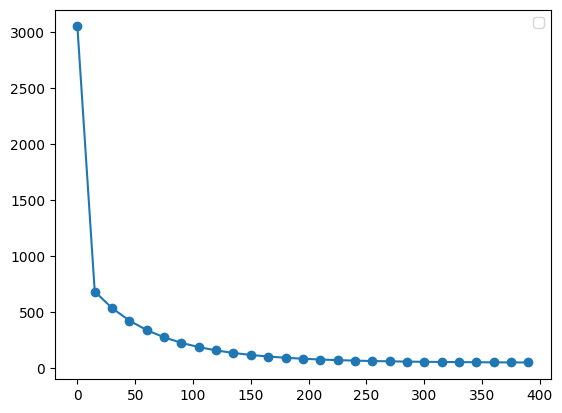

In [4]:
plt.scatter(iter_, err_)
plt.plot(iter_, err_)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


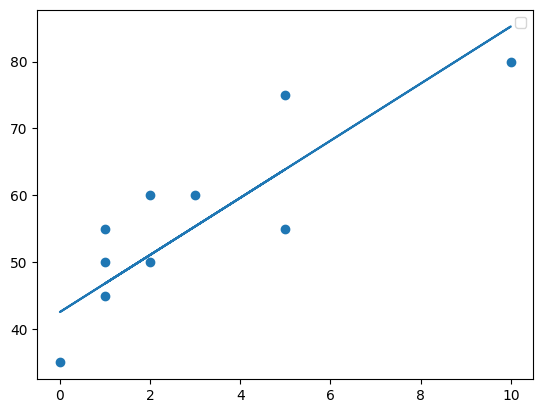

In [5]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred)

plt.legend()
plt.show()

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [6]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [6.93 9.12], MSE = 3047.75
Iteration #10: W_new = [12.13868515 10.14042547], MSE = 570.77
Iteration #20: W_new = [15.7611049   9.44419993], MSE = 461.23
Iteration #30: W_new = [18.98497043  8.82457608], MSE = 374.46
Iteration #40: W_new = [21.8541324   8.27312591], MSE = 305.74
Iteration #50: W_new = [24.40761684  7.78234866], MSE = 251.3
Iteration #60: W_new = [26.68015593  7.34556883], MSE = 208.19
Iteration #70: W_new = [28.7026605  6.9568454], MSE = 174.04
Iteration #80: W_new = [30.50264041  6.610891  ], MSE = 146.99
Iteration #90: W_new = [32.10457879  6.30299998], MSE = 125.57


*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [15]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
MSE_=[]
i=0
while True:
    
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    MSE_.append(err)
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    # print(MSE_[i])
    
    if i> 10:
        z=MSE_[i-1]/MSE_[i]
        # print(z)
        if z-1<0.0001:
            print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
            break
    i=i+1   

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [6.93 9.12], MSE = 3047.75
Iteration #10: W_new = [12.13868515 10.14042547], MSE = 570.77
Iteration #20: W_new = [15.7611049   9.44419993], MSE = 461.23
Iteration #30: W_new = [18.98497043  8.82457608], MSE = 374.46
Iteration #40: W_new = [21.8541324   8.27312591], MSE = 305.74
Iteration #50: W_new = [24.40761684  7.78234866], MSE = 251.3
Iteration #60: W_new = [26.68015593  7.34556883], MSE = 208.19
Iteration #70: W_new = [28.7026605  6.9568454], MSE = 174.04
Iteration #80: W_new = [30.50264041  6.610891  ], MSE = 146.99
Iteration #90: W_new = [32.10457879  6.30299998], MSE = 125.57
Iteration #100: W_new = [33.53026502  6.02898446], MSE = 108.6
Iteration #110: W_new = [34.79909112  5.78511731], MSE = 95.16
Iteration #120: W_new = [35.92831551  5.56808146], MSE = 84.52
Iteration #130: W_new = [36.93329778  5.37492484], MSE = 76.09
Iteration #140: W_new = [37.82770758  5.20302